<a href="https://colab.research.google.com/github/KhunJahad/Flipr-Hackathon-6.0-ML/blob/master/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

# Util Functions

In [79]:
def statistics(train_dataset):
  train_stats = train_dataset.describe()
  train_stats = train_stats.transpose()
  return train_stats

In [80]:
def norm(x,train_stats):
  return (x - train_stats['mean']) / train_stats['std']

In [81]:
def preprocess(df):
  df.drop(columns=['Popuation [2001]'],inplace=True,axis=1)
  df.drop(columns=['City'],inplace=True,axis=1)
  df.drop(columns=['State','Type','SWM'],axis=1,inplace=True)
  
  for j in range(0,df.shape[0]):
    df['Population [2011]'][j]=str(df['Population [2011]'][j])
    df['Population [2011]'][j] = df['Population [2011]'][j].replace(',', '')
    df['Population [2011]'][j]=float(df['Population [2011]'][j])
  
  for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

  return df

In [82]:
def num(x,y):
  diff=abs(x.flatten()-y.flatten())
  count=0;
  total=0;
  for item in diff:
    total+=1
    if item<=1000:
      count+=1

  return 100*(count/total)

In [83]:
# Regression chart 
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Data Preprocessing

In [84]:
df_train=pd.read_csv(r"/content/Train_dataset - Train_data.csv")
df_train=preprocess(df_train)

y = df_train.pop('Covid Cases')

In [85]:
df_train.describe()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
count,7.870000e+02,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,7.870000e+02,787.000000,7.870000e+02
mean,2.961837e+05,905.716645,26.179161,30.942821,95.951715,150.298602,0.498836,2.537475e+05,41.585769,1.364006e+06
std,8.617392e+05,36.782315,2.088908,6.892525,30.032641,25.979313,0.266036,7.609946e+05,28.870311,1.587678e+06
min,3.677600e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02
25%,5.356600e+04,877.000000,24.000000,28.000000,71.000000,130.500000,0.284780,4.736400e+04,18.000000,2.378540e+05
50%,7.910600e+04,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05
75%,2.247195e+05,928.000000,28.000000,36.000000,117.000000,171.000000,0.701104,1.898310e+05,66.000000,1.489500e+06
max,1.244237e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06


In [86]:
x=df_train.values
y=y.values

In [87]:
stats=statistics(df_train)
print(stats)

                   count          mean  ...           75%           max
Population [2011]  787.0  2.961837e+05  ...  2.247195e+05  1.244237e+07
Sex Ratio          787.0  9.057166e+02  ...  9.280000e+02  1.042000e+03
Median Age         787.0  2.617916e+01  ...  2.800000e+01  3.200000e+01
Avg Temp           787.0  3.094282e+01  ...  3.600000e+01  4.000000e+01
Toilets Avl        787.0  9.595172e+01  ...  1.170000e+02  2.270000e+02
Water Purity       787.0  1.502986e+02  ...  1.710000e+02  2.000000e+02
H Index            787.0  4.988364e-01  ...  7.011036e-01  9.997737e-01
Female Population  787.0  2.537475e+05  ...  1.898310e+05  1.092440e+07
# of hospitals     787.0  4.158577e+01  ...  6.600000e+01  1.590000e+02
Foreign Visitors   787.0  1.364006e+06  ...  1.489500e+06  4.684707e+06

[10 rows x 8 columns]


In [88]:
x = norm(df_train,stats)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Model And Training

In [90]:
model=Sequential()
model.add(Dropout(0.2))
model.add(Dense(512, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(512, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output

optim=tf.keras.optimizers.Adam(0.005)

model.compile(loss='mean_squared_error',optimizer=optim)
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=1000)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [91]:
# Predict
pred_valid = model.predict(x_test)
pred_train=model.predict(x_train)

64.23728813559322
67.51269035532995


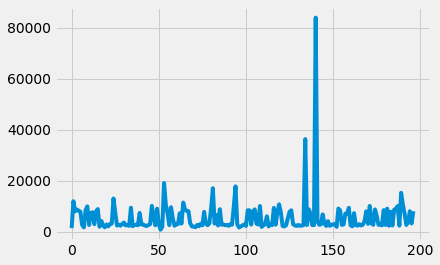

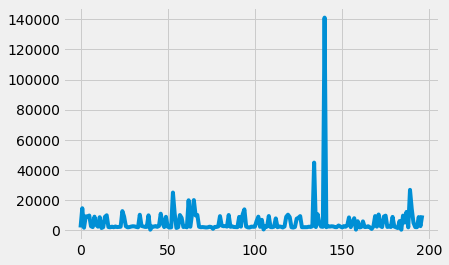

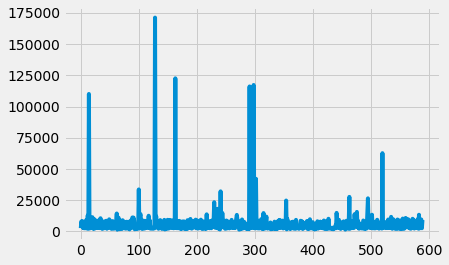

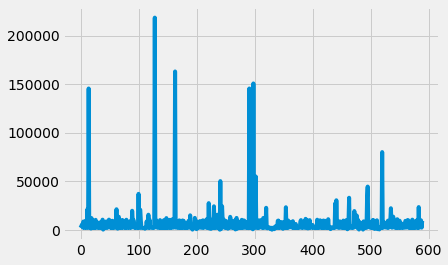

In [92]:
# chcking error range and plotting
print(num(pred_train,y_train)) 
print(num(pred_valid,y_test))

plt.plot(pred_valid)
plt.show()
plt.plot(y_test)
plt.show()

plt.plot(pred_train)
plt.show()
plt.plot(y_train)
plt.show()

In [93]:
# Measure RMSE error-- see how they perform .. i don't think this overfits 
score = np.sqrt(metrics.mean_squared_error(pred_valid,y_test))
print("Final score (RMSE): {}".format(score))

score_train=np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Final score (RMSE):Train {}".format(score_train))

Final score (RMSE): 4886.50841612128
Final score (RMSE):Train 4649.899021202064


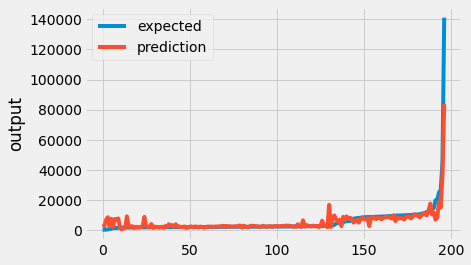

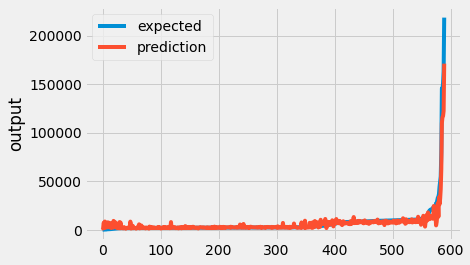

In [94]:
chart_regression(pred_valid.flatten(),y_test)
chart_regression(pred_train.flatten(),y_train)

[]

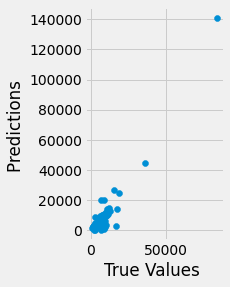

In [95]:
test_predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_predictions,y_test)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.plot()

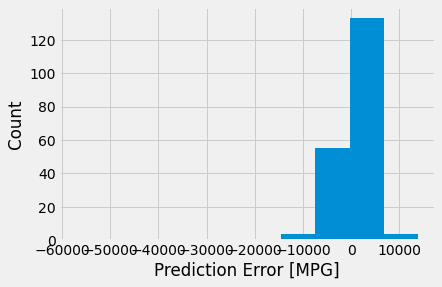

In [96]:
error = test_predictions - y_test.flatten()
plt.hist(error)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Solution

The error prediciton curve is gaussian and i don't think its overfitting.

So I will go with this one

In [20]:
df_test=pd.read_csv(r'/content/Test_dataset - Test_data.csv')
city_name=df_test['City']
df_test=preprocess(df_test)

In [21]:
df_test.shape

(501, 10)

In [22]:
x_final = norm(df_test,stats)
print(x_final)

     Population [2011]  Sex Ratio  ...  # of hospitals  Foreign Visitors
0            -0.301030   0.687378  ...       -0.851593         -0.857376
1            -0.301054   0.768939  ...       -0.990144         -0.458219
2            -0.301079  -0.617597  ...       -0.851593         -0.706465
3            -0.301109  -0.508849  ...       -1.059419          1.917839
4            -0.301152  -0.780719  ...       -0.643768          1.095974
..                 ...        ...  ...             ...               ...
496          -0.341800  -1.569141  ...       -1.301883         -0.792431
497          -0.341944  -1.460393  ...       -1.232608         -0.792431
498          -0.342994  -1.433206  ...       -1.232608         -0.792431
499          -0.343577  -1.460393  ...       -1.163332         -0.792431
500          -0.314462  -1.161337  ...       -1.232608          1.095974

[501 rows x 10 columns]


In [23]:
x_final.isna().sum()

Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
dtype: int64

In [24]:
print(x_final.shape)

(501, 10)


In [25]:
result=[]

output=model.predict(x_final)
city=city_name.values
for i in range(0,501):
  result.append([city[i],output[i]])

df=pd.DataFrame(result,columns=['City','Covid Cases'])
df.to_csv('solution 01.csv',index=False)

# Task-2

In [26]:
# importing again

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
df=pd.read_csv("/content/Test_dataset - Foreign_Visitors_TS.csv",header=None,names=['City','April','May','June','July','August'])
df.head()

,City,April,May,June,July,August
0,City,Time Series Data,NaN,NaN,NaN,NaN
1,NaN,April,May,June,July,August
2,Tuensang,1614,1946,2372,2500,2769
3,Lakshmeshwar,369179,445559,541045,572860,636502
4,Zira,140581,169665,206030,218138,242367


In [28]:
df.drop(index=[0,1],axis=0,inplace=True)
city=df.pop('City')
df.fillna(0,inplace=True)
labels=df['August']

data = df.to_numpy()

In [29]:
city=city.values
labels=labels.values.astype('int')

In [34]:
new_pass=[]

In [ ]:
for part in data:
  x_train=[]
  y_train=[]
  for i in range(4):
    a=int(part[i])
    b=int(part[i+1])
    x_train.append(a)
    y_train.append(b)
  x_train = np.array(x_train).reshape(4, 1, 1)
  y_train=np.array(y_train)
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  history = model.fit(x_train,y_train, epochs=1000, verbose=0)
  c=int(part[-1])
  test_input = np.array([c])
  test_input = test_input.reshape((1, 1, 1))
  test_output = model.predict(test_input, verbose=0)
  new_pass.append(test_output)

In [61]:
new_pass[0][0][0]

3123.4846

In [97]:
temp=pd.read_csv(r"/content/Test_dataset - Test_data.csv")

In [98]:
temp_2=temp.pop('Foreign Visitors')

In [99]:
temp_2[0]

2769.0

In [100]:
foreign=[max(new_pass[i][0][0],temp_2[i]+500) for i in range(501)]

In [101]:
len(foreign)

501

In [102]:
temp

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals
0,Tuensang,Nagaland,T.C,"36,774",NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0
1,Lakshmeshwar,Karnataka,T.M.C,"36,754",NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0
2,Zira,Punjab,M.Cl.,"36,732",NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0
3,Yawal,Maharashtra,M.Cl,"36,706",NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0
4,Thana Bhawan,Uttar Pradesh,N.P.,"36,669",NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Nandaprayag,Uttarakhand,N.P,"1,641",NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0
497,Kirtinagar,Uttarakhand,N.P,"1,517",NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0
498,Kedarnath,Uttarakhand,N.P,612,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0
499,Gangotri,Uttarakhand,N.P,110,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0


In [103]:
temp['Foreign Visitors']=foreign

In [104]:
temp

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,"36,774",NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,3.269000e+03
1,Lakshmeshwar,Karnataka,T.M.C,"36,754",NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,7.190591e+05
2,Zira,Punjab,M.Cl.,"36,732",NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,2.739134e+05
3,Yawal,Maharashtra,M.Cl,"36,706",NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4.982870e+06
4,Thana Bhawan,Uttar Pradesh,N.P.,"36,669",NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3.399307e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Nandaprayag,Uttarakhand,N.P,"1,641",NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0,1.196599e+05
497,Kirtinagar,Uttarakhand,N.P,"1,517",NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0,1.196603e+05
498,Kedarnath,Uttarakhand,N.P,612,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0,1.196602e+05
499,Gangotri,Uttarakhand,N.P,110,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0,1.196602e+05


In [105]:
city_name=temp['City']
df_test=preprocess(temp)

In [106]:
x_final = norm(df_test,stats)
print(x_final)

     Population [2011]  Sex Ratio  ...  # of hospitals  Foreign Visitors
0            -0.301030   0.687378  ...       -0.851593         -0.857061
1            -0.301054   0.768939  ...       -0.990144         -0.406220
2            -0.301079  -0.617597  ...       -0.851593         -0.686596
3            -0.301109  -0.508849  ...       -1.059419          2.279344
4            -0.301152  -0.780719  ...       -0.643768          1.281936
..                 ...        ...  ...             ...               ...
496          -0.341800  -1.569141  ...       -1.301883         -0.783753
497          -0.341944  -1.460393  ...       -1.232608         -0.783752
498          -0.342994  -1.433206  ...       -1.232608         -0.783752
499          -0.343577  -1.460393  ...       -1.163332         -0.783752
500          -0.314462  -1.161337  ...       -1.232608          1.096289

[501 rows x 10 columns]


In [107]:
x_final.isna().sum()

Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
dtype: int64

In [108]:
result=[]

output=model.predict(x_final)
city=city_name.values
for i in range(0,501):
  result.append([city[i],output[i]])

df=pd.DataFrame(result,columns=['City','Covid Cases'])
df.to_csv('solution 02.csv',index=False)